# 2.3.1. Загрузка данных и первичный анализ

1) Импортировать библиотеки: `pandas`, `numpy`, `scikit-learn` (модели, CV, метрики), `matplotlib` (для графиков).  
2) Загрузить выбранный CSV в `pandas.DataFrame`.  
3) Зафиксировать минимум:

   - `head()`, `info()`, базовые статистики (`describe()` или аналог);
   - распределение таргета `target` (доли классов);
   - (желательно) проверку пропусков и типы столбцов.

4) Определить:

   - `X` – признаки (все столбцы, кроме `target`; столбец `id` не использовать как признак);
   - `y` – таргет (`target`).

pandas - для работы с табличными данными, загрузки CSV-файла

numpy - для численных операций

scikit-learn:

DecisionTreeClassifier - модель дерева решений

RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier - ансамблевые модели

train_test_split, cross_val_score, GridSearchCV, StratifiedKFold - для разделения данных и кросс-валидации

accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report - метрики оценки моделей

StandardScaler - для масштабирования признаков

matplotlib и seaborn - для визуализации данных и результатов

warnings - для управления предупреждениями

In [1]:
import pandas as pd
import numpy as np

import os

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.inspection import permutation_importance

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_dir = '/content/drive/MyDrive/seminars/S06'
os.chdir(base_dir)

print("Текущая директория:", os.getcwd())

df = pd.read_csv('S06-hw-dataset-01.csv')

Текущая директория: /content/drive/MyDrive/seminars/S06


Зафиксировать минимум:

head(), info(), базовые статистики (describe() или аналог);
распределение таргета target (доли классов);
(желательно) проверку пропусков и типы столбцов.

In [9]:
print(f"Размер датасета (shape): {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

Размер датасета (shape): (12000, 30)
Количество строк: 12000
Количество столбцов: 30


In [10]:
df.head()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [8]:
df.describe().round(2)

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,...,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,6000.50,0.01,-0.01,-0.00,0.04,-0.01,-0.87,-0.70,-0.29,-0.01,...,-0.32,-1.31,0.32,-0.00,0.03,0.99,1.99,1.51,36.08,0.32
std,3464.25,2.10,3.54,1.00,2.09,1.01,3.89,1.99,3.46,1.00,...,2.17,3.73,2.22,1.00,1.88,0.82,1.41,1.12,25.06,0.47
min,1.00,-8.16,-14.61,-4.37,-7.75,-4.00,-15.24,-7.38,-13.85,-3.79,...,-8.37,-14.25,-8.64,-3.53,-7.92,0.00,0.00,0.00,0.00,0.00
25%,3000.75,-1.42,-2.30,-0.69,-1.37,-0.68,-3.53,-2.06,-2.60,-0.68,...,-1.81,-3.86,-1.10,-0.68,-1.11,0.00,1.00,0.00,17.00,0.00
50%,6000.50,-0.05,0.05,-0.01,0.04,-0.00,-1.09,-0.80,-0.21,-0.02,...,-0.38,-1.39,0.43,0.01,0.28,1.00,2.00,2.00,30.00,0.00
75%,9000.25,1.42,2.34,0.67,1.48,0.67,1.53,0.52,2.09,0.67,...,1.13,1.12,1.85,0.66,1.36,2.00,3.00,3.00,49.00,1.00
max,12000.00,8.61,16.30,3.65,7.57,4.56,16.22,8.01,13.03,3.98,...,7.96,15.94,8.10,3.71,7.55,2.00,4.00,3.00,120.00,1.00


Hаспределение таргета target (доли классов);
также проверка пропусков и типы столбцов.

Определить:

X – признаки (все столбцы, кроме target; столбец id не использовать как признак);
y – таргет (target).

In [12]:
# 1. Распределение таргета target (доли классов)
print("РАСПРЕДЕЛЕНИЕ ТАРГЕТА 'target':")

target_counts = df['target'].value_counts()
target_percentages = df['target'].value_counts(normalize=True) * 100

print(f"Класс 0: {target_counts[0]} ({target_percentages[0]:.1f}%)")
print(f"Класс 1: {target_counts[1]} ({target_percentages[1]:.1f}%)")
print(f"Всего: {len(df)} наблюдений")
print(f"Соотношение: {target_counts[0]}:{target_counts[1]} ({target_counts[0]/target_counts[1]:.2f}:1)")

# 2. Проверка пропусков
print("\nПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:")

missing_values = df.isnull().sum()
missing_total = missing_values.sum()

if missing_total == 0:
    print("Пропусков нет")
else:
    print(f"Пропущено значений: {missing_total}")
    for col in df.columns:
        if missing_values[col] > 0:
            print(f"  {col}: {missing_values[col]}")

# 3. Типы столбцов
print("\nТИПЫ СТОЛБЦОВ:")

print(df.dtypes)

# 4. Определение X и y
print("РАЗДЕЛЕНИЕ НА ПРИЗНАКИ И ЦЕЛЕВУЮ ПЕРЕМЕННУЮ")

X = df.drop(['id', 'target'], axis=1)
y = df['target']

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")
print(f"\nКолонки X: {list(X.columns)}")
print(f"\nПервые 5 значений y:\n{y.head()}")

РАСПРЕДЕЛЕНИЕ ТАРГЕТА 'target':
Класс 0: 8119 (67.7%)
Класс 1: 3881 (32.3%)
Всего: 12000 наблюдений
Соотношение: 8119:3881 (2.09:1)

ПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:
Пропусков нет

ТИПЫ СТОЛБЦОВ:
id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float64
num08            float64
num09            float64
num10            float64
num11            float64
num12            float64
num13            float64
num14            float64
num15            float64
num16            float64
num17            float64
num18            float64
num19            float64
num20            float64
num21            float64
num22            float64
num23            float64
num24            float64
cat_contract       int64
cat_region         int64
cat_payment        int64
tenure_months      int64
target             int64
dtype: object
РАЗДЕЛЕНИЕ НА ПРИЗНАКИ И ЦЕЛЕВУЮ ПЕРЕМЕННУ

#### 2.3.2. Train/Test-сплит и воспроизводимость

1) Разделить данные на train/test:

   - `test_size` разумный (например, 0.2 или 0.25);
   - обязательно фиксировать `random_state` (например, 42);
   - для классификации – использовать `stratify=y`.

2) Коротко пояснить, почему фиксированный seed и стратификация важны.

In [13]:
print("РАЗДЕЛЕНИЕ НА TRAIN/TEST")

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

print(f"X_train: {X_train.shape} (75%)")
print(f"X_test:  {X_test.shape} (25%)")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")

print("\nРАСПРЕДЕЛЕНИЕ КЛАССОВ:")
print(f"Исходные:  Class 0: {y.value_counts()[0]} ({y.value_counts(normalize=True)[0]*100:.1f}%)")
print(f"          Class 1: {y.value_counts()[1]} ({y.value_counts(normalize=True)[1]*100:.1f}%)")
print(f"Train:     Class 0: {y_train.value_counts()[0]} ({y_train.value_counts(normalize=True)[0]*100:.1f}%)")
print(f"          Class 1: {y_train.value_counts()[1]} ({y_train.value_counts(normalize=True)[1]*100:.1f}%)")
print(f"Test:      Class 0: {y_test.value_counts()[0]} ({y_test.value_counts(normalize=True)[0]*100:.1f}%)")
print(f"          Class 1: {y_test.value_counts()[1]} ({y_test.value_counts(normalize=True)[1]*100:.1f}%)")

РАЗДЕЛЕНИЕ НА TRAIN/TEST
X_train: (9000, 28) (75%)
X_test:  (3000, 28) (25%)
y_train: (9000,)
y_test:  (3000,)

РАСПРЕДЕЛЕНИЕ КЛАССОВ:
Исходные:  Class 0: 8119 (67.7%)
          Class 1: 3881 (32.3%)
Train:     Class 0: 6089 (67.7%)
          Class 1: 2911 (32.3%)
Test:      Class 0: 2030 (67.7%)
          Class 1: 970 (32.3%)


# **Пояснение:**

Фиксированный random_state (seed=42) важен для:

* Воспроизводимости результатов - при каждом запуске кода данные разделяются

одинаково

* Сравнения моделей - можно честно сравнивать разные алгоритмы на одних и тех же данных

* Отладки - ошибки можно воспроизвести и исправить

* Документирования - эксперимент можно повторить точно

Stratify=y важен для:

* Сохранения распределения классов - в train и test будет тот же % Class 0/Class 1, что и в исходных данных

* Критично при дисбалансе - у нас соотношение 67%/33%, без stratify в test могло бы попасть слишком много/мало примеров миноритарного класса

* Честной оценки - модель оценивается на репрезентативной выборке

* Предотвращения bias - если в test попадут только Class 0, модель никогда не увидит Class 1 при оценке

Без этих параметров результаты были бы случайными и несопоставимыми между запусками.

#### 2.3.3. Baseline’ы

Сделать минимум два baseline’а:

1) `DummyClassifier` (например, `most_frequent` или `stratified`).  
2) `LogisticRegression` (желательно через `Pipeline(StandardScaler + LogisticRegression)`).

Для обоих baseline’ов посчитать метрики на test (см. ниже) и кратко интерпретировать.


In [11]:
print("БАЗОВЫЕ МОДЕЛИ (BASELINE)")

# 1. DummyClassifier (самая простая модель)
print("\n1. DummyClassifier (most_frequent):")

dummy = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy.fit(X_train, y_train)

# Предсказания и метрики
y_pred_dummy = dummy.predict(X_test)

print(f"Стратегия: 'most_frequent' (всегда предсказывает самый частый класс)")

print(f"Accuracy:  {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dummy):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_dummy):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_dummy):.4f}")

print("Матрица ошибок:")

print(confusion_matrix(y_test, y_pred_dummy))

# 2. LogisticRegression (через Pipeline)
print("\n\n2. LogisticRegression с StandardScaler (Pipeline):")

# Создаем pipeline: StandardScaler → LogisticRegression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)

# Предсказания и метрики
y_pred_logreg = logreg_pipeline.predict(X_test)

print(f"Accuracy:  {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_logreg):.4f}")

print("Матрица ошибок:")

print(confusion_matrix(y_test, y_pred_logreg))

# 3. Сравнение baseline моделей

print("СРАВНЕНИЕ BASELINE МОДЕЛЕЙ")


print(f"{'Модель':<30} {'Accuracy':<10} {'F1-score':<10}")

print(f"{'Dummy (most_frequent)':<30} {accuracy_score(y_test, y_pred_dummy):<10.4f} {f1_score(y_test, y_pred_dummy):<10.4f}")
print(f"{'LogisticRegression':<30} {accuracy_score(y_test, y_pred_logreg):<10.4f} {f1_score(y_test, y_pred_logreg):<10.4f}")

# Коэффициенты логистической регрессии
print("\n\nКоэффициенты LogisticRegression (первые 5 самых важных):")

feature_names = X_train.columns
coefs = logreg_pipeline.named_steps['logreg'].coef_[0]

coef_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coefs,
    'Абс.значение': np.abs(coefs)
}).sort_values('Абс.значение', ascending=False)

print(coef_df.head(5).to_string(index=False))

БАЗОВЫЕ МОДЕЛИ (BASELINE)

1. DummyClassifier (most_frequent):
Стратегия: 'most_frequent' (всегда предсказывает самый частый класс)
Accuracy:  0.6767
Precision: 0.0000
Recall:    0.0000
F1-score:  0.0000
Матрица ошибок:
[[2030    0]
 [ 970    0]]


2. LogisticRegression с StandardScaler (Pipeline):
Accuracy:  0.8297
Precision: 0.7795
Recall:    0.6598
F1-score:  0.7147
Матрица ошибок:
[[1849  181]
 [ 330  640]]
СРАВНЕНИЕ BASELINE МОДЕЛЕЙ
Модель                         Accuracy   F1-score  
Dummy (most_frequent)          0.6767     0.0000    
LogisticRegression             0.8297     0.7147    


Коэффициенты LogisticRegression (первые 5 самых важных):
Признак  Коэффициент  Абс.значение
  num19    -1.030915      1.030915
  num20    -0.782791      0.782791
  num07     0.703542      0.703542
  num17    -0.585884      0.585884
  num18     0.565624      0.565624


# **Объяснение baseline моделей:**

    DummyClassifier (most_frequent):

Всегда предсказывает самый частый класс (Class 0)

Это нижняя граница: любая осмысленная модель должна быть лучше

Accuracy = доле самого частого класса (~67%)

    LogisticRegression с StandardScaler:

Pipeline гарантирует, что scaling применяется только к train

StandardScaler важен для линейных моделей

Это разумная базовая линейная модель для сравнения

Метрики показывают, насколько сложная задача

#### 2.3.4. Модели недели 6 (обязательно)

Реализовать и сравнить минимум 3 модели недели 6 (рекомендуется 4):

- `DecisionTreeClassifier`  
  Обязательно показать **контроль сложности** (например, `max_depth` + `min_samples_leaf`; или `ccp_alpha`).

- `RandomForestClassifier`  
  Желательно посмотреть хотя бы одну из "лесных" ручек (`max_features`, `min_samples_leaf`, `max_depth`).

- Один boosting на выбор:
  - `AdaBoostClassifier` или
  - `GradientBoostingClassifier` или
  - `HistGradientBoostingClassifier`

- (опционально) `StackingClassifier` (2-3 базовых модели + метамодель).  
  Важно: делать стекинг **корректно** (через CV-логику; `StackingClassifier` в sklearn это делает).

Подбор гиперпараметров:

- выполнять **только на train** через CV (`GridSearchCV` или аккуратный перебор);
- test использовать **один раз** для финальной оценки.


In [13]:
# 1. DecisionTreeClassifier
print("DecisionTreeClassifier")

# Простое дерево без ограничений
dt_simple = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_simple.fit(X_train, y_train)
y_pred_dt_simple = dt_simple.predict(X_test)

print(f"Без ограничений:")
print(f"  Глубина: {dt_simple.get_depth()}")
print(f"  Листьев: {dt_simple.get_n_leaves()}")
print(f"  Accuracy (train): {accuracy_score(y_train, dt_simple.predict(X_train)):.4f}")
print(f"  Accuracy (test):  {accuracy_score(y_test, y_pred_dt_simple):.4f}")

# Дерево с контролем сложности
dt_controlled = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=5,
    random_state=RANDOM_STATE
)
dt_controlled.fit(X_train, y_train)
y_pred_dt_controlled = dt_controlled.predict(X_test)

print(f"\nС контролем сложности (max_depth=5, min_samples_leaf=5):")
print(f"  Глубина: {dt_controlled.get_depth()}")
print(f"  Листьев: {dt_controlled.get_n_leaves()}")
print(f"  Accuracy (train): {accuracy_score(y_train, dt_controlled.predict(X_train)):.4f}")
print(f"  Accuracy (test):  {accuracy_score(y_test, y_pred_dt_controlled):.4f}")

# 2. RandomForestClassifier
print("\n\nRandomForestClassifier")


# GridSearchCV для подбора параметров
rf_params = {
    'n_estimators': [100],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', None]
}

rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print(f"Лучшие параметры: {rf_grid.best_params_}")
print(f"F1 (CV): {rf_grid.best_score_:.4f}")
print(f"Accuracy (test): {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 (test): {f1_score(y_test, y_pred_rf):.4f}")

# 3. GradientBoostingClassifier
print("\n\nGradientBoostingClassifier")

# GridSearchCV для подбора параметров
gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='f1')
gb_grid.fit(X_train, y_train)

best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)

print(f"Лучшие параметры: {gb_grid.best_params_}")
print(f"F1 (CV): {gb_grid.best_score_:.4f}")
print(f"Accuracy (test): {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"F1 (test): {f1_score(y_test, y_pred_gb):.4f}")

# 4. Сравнение моделей
print("\n\nСРАВНЕНИЕ МОДЕЛЕЙ")


# Baseline для сравнения
y_pred_baseline = logreg_pipeline.predict(X_test)

print(f"{'Модель':<25} {'Accuracy':<10} {'F1-score':<10}")

print(f"{'LogisticRegression':<25} {accuracy_score(y_test, y_pred_baseline):<10.4f} {f1_score(y_test, y_pred_baseline):<10.4f}")
print(f"{'DecisionTree (simple)':<25} {accuracy_score(y_test, y_pred_dt_simple):<10.4f} {f1_score(y_test, y_pred_dt_simple):<10.4f}")
print(f"{'DecisionTree (controlled)':<25} {accuracy_score(y_test, y_pred_dt_controlled):<10.4f} {f1_score(y_test, y_pred_dt_controlled):<10.4f}")
print(f"{'RandomForest':<25} {accuracy_score(y_test, y_pred_rf):<10.4f} {f1_score(y_test, y_pred_rf):<10.4f}")
print(f"{'GradientBoosting':<25} {accuracy_score(y_test, y_pred_gb):<10.4f} {f1_score(y_test, y_pred_gb):<10.4f}")

DecisionTreeClassifier
Без ограничений:
  Глубина: 24
  Листьев: 641
  Accuracy (train): 1.0000
  Accuracy (test):  0.8567

С контролем сложности (max_depth=5, min_samples_leaf=5):
  Глубина: 5
  Листьев: 32
  Accuracy (train): 0.8638
  Accuracy (test):  0.8443


RandomForestClassifier
Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
F1 (CV): 0.8819
Accuracy (test): 0.9307
F1 (test): 0.8878


GradientBoostingClassifier
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
F1 (CV): 0.8835
Accuracy (test): 0.9257
F1 (test): 0.8802


СРАВНЕНИЕ МОДЕЛЕЙ
Модель                    Accuracy   F1-score  
LogisticRegression        0.8297     0.7147    
DecisionTree (simple)     0.8567     0.7767    
DecisionTree (controlled) 0.8443     0.7271    
RandomForest              0.9307     0.8878    
GradientBoosting          0.9257     0.8802    


#### 2.3.5. Метрики качества (обязательно)

Минимальный набор:

- `accuracy` – всегда
- `f1`:
  - для бинарной классификации: обычный `f1`
  - для мультикласса (`S06-hw-dataset-03.csv`): `f1_macro` (или явно пояснить выбранный вариант)
- `ROC-AUC`:
  - обязательно для бинарных датасетов (если модель даёт вероятности)
  - для мультикласса можно:
    - либо не считать ROC-AUC (и явно написать почему),
    - либо посчитать multi-class AUC (например, OVR) и объяснить.

Рекомендуемые диагностические графики:

- ROC-кривая (для бинарных задач);
- confusion matrix;
- (по желанию для дисбаланса, особенно dataset-04) PR-кривая.


МЕТРИКИ КАЧЕСТВА ДЛЯ БИНАРНОЙ КЛАССИФИКАЦИИ

1. Accuracy и F1-score (бинарная классификация):
Модель                    Accuracy   F1-score  
DummyClassifier           0.6767     0.0000    
LogisticRegression        0.8297     0.7147    
DecisionTree (simple)     0.8567     0.7767    
DecisionTree (controlled) 0.8443     0.7271    
RandomForest              0.9307     0.8878    
GradientBoosting          0.9257     0.8802    


2. ROC-AUC (только модели с вероятностями):
Модель                    ROC-AUC   
LogisticRegression        0.8789    
DecisionTree (simple)     0.8343    
DecisionTree (controlled) 0.8624    
RandomForest              0.9697    
GradientBoosting          0.9686    
DummyClassifier           N/A       


3. ROC-кривые:
ROC-кривая сохранена: /content/drive/MyDrive/seminars/S06/roc_curves.png


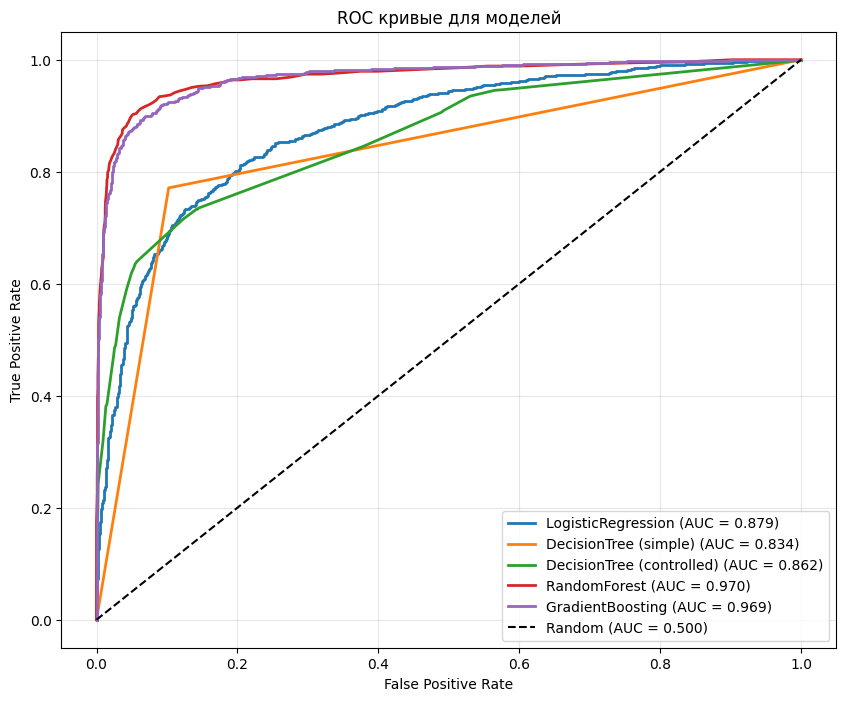



4. Матрицы ошибок (Confusion Matrix):
Матрицы ошибок сохранены: /content/drive/MyDrive/seminars/S06/confusion_matrices.png


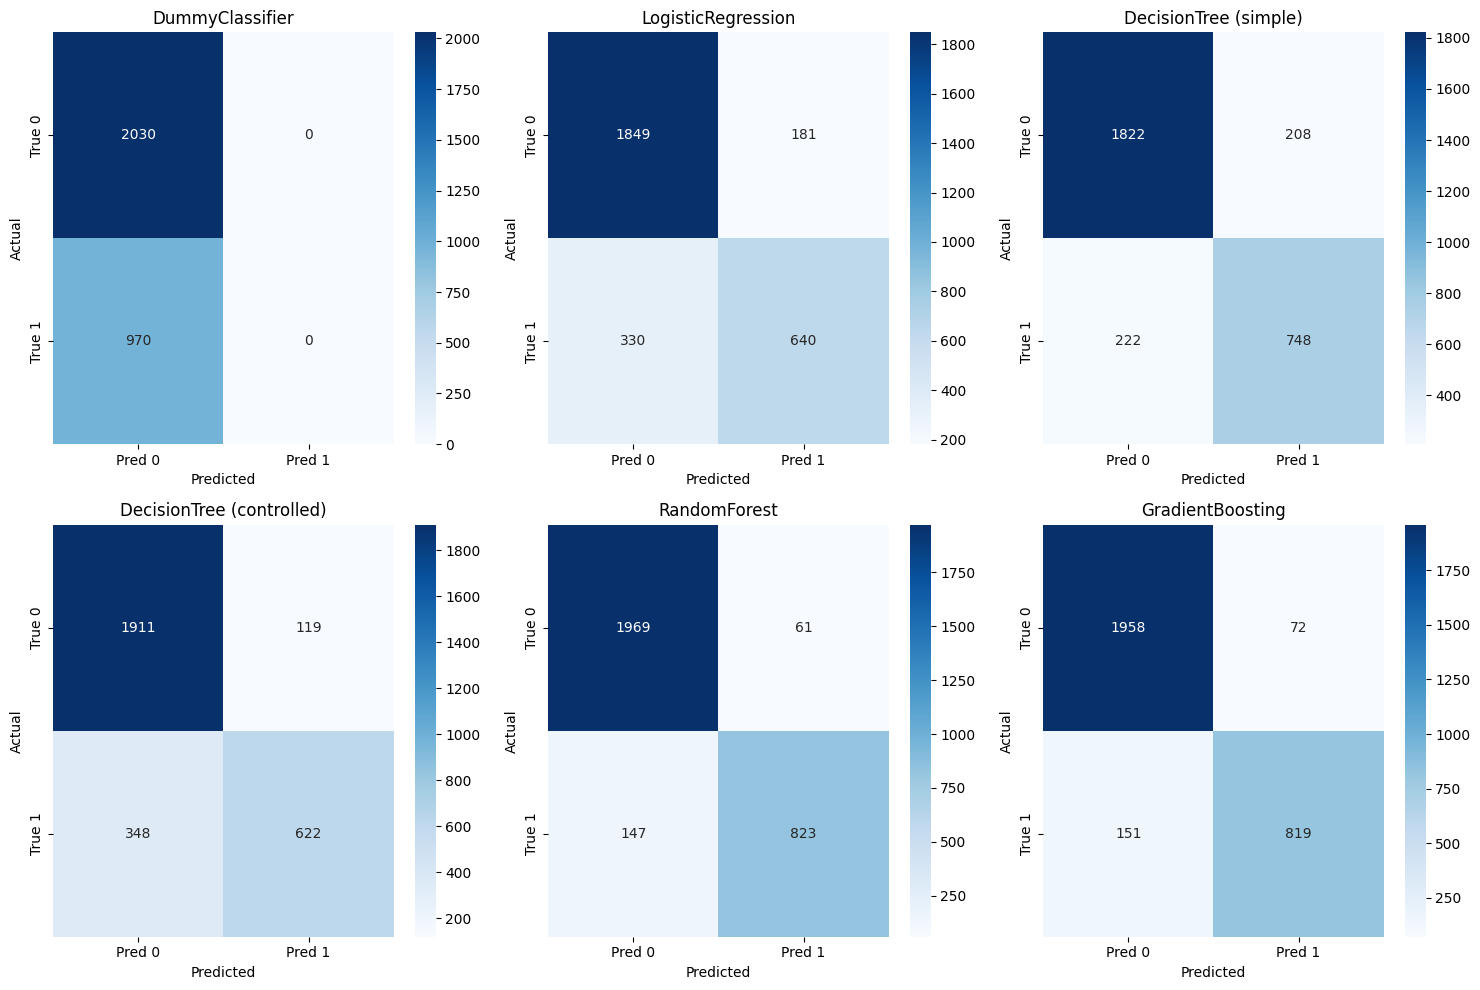



5. PR-кривые (Precision-Recall):


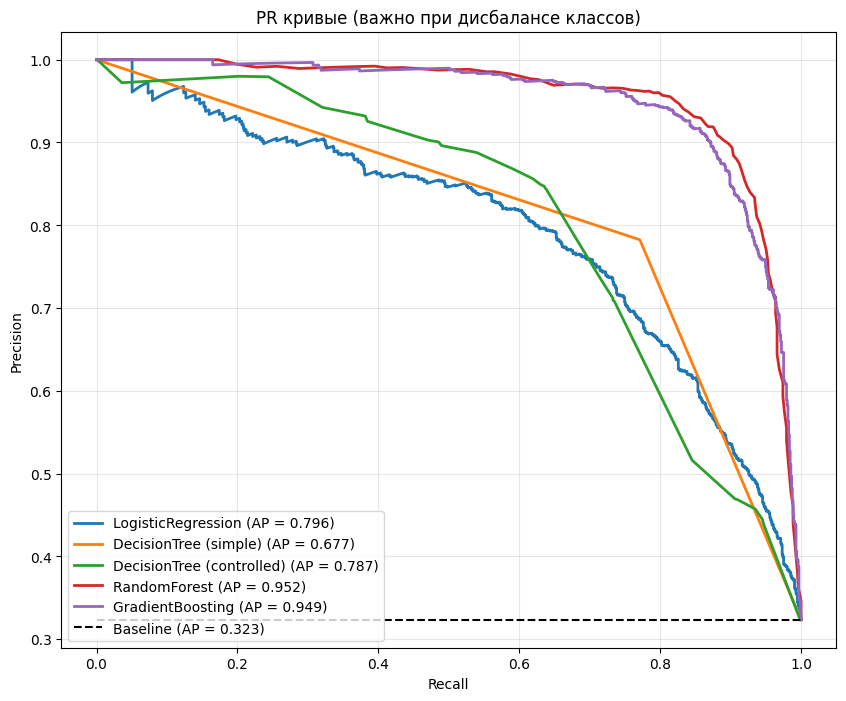

In [24]:
# МЕТРИКИ КАЧЕСТВА
print("МЕТРИКИ КАЧЕСТВА ДЛЯ БИНАРНОЙ КЛАССИФИКАЦИИ")

# 1. Accuracy и F1 для всех моделей
print("\n1. Accuracy и F1-score (бинарная классификация):")

print(f"{'Модель':<25} {'Accuracy':<10} {'F1-score':<10}")

models = [
    ('DummyClassifier', y_pred_dummy),
    ('LogisticRegression', y_pred_logreg),
    ('DecisionTree (simple)', y_pred_dt_simple),
    ('DecisionTree (controlled)', y_pred_dt_controlled),
    ('RandomForest', y_pred_rf),
    ('GradientBoosting', y_pred_gb)
]

for model_name, y_pred in models:
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name:<25} {acc:<10.4f} {f1:<10.4f}")

# 2. ROC-AUC для моделей с вероятностями
print("\n\n2. ROC-AUC (только модели с вероятностями):")

print(f"{'Модель':<25} {'ROC-AUC':<10}")

# Модели, которые дают вероятности
prob_models = [
    ('LogisticRegression', logreg_pipeline.predict_proba(X_test)[:, 1]),
    ('DecisionTree (simple)', dt_simple.predict_proba(X_test)[:, 1]),
    ('DecisionTree (controlled)', dt_controlled.predict_proba(X_test)[:, 1]),
    ('RandomForest', best_rf.predict_proba(X_test)[:, 1]),
    ('GradientBoosting', best_gb.predict_proba(X_test)[:, 1])
]

for model_name, y_proba in prob_models:
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"{model_name:<25} {roc_auc:<10.4f}")

# DummyClassifier не дает вероятностей
print(f"{'DummyClassifier':<25} {'N/A':<10}")

# 3. ROC-кривая
print("\n\n3. ROC-кривые:")

from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))

# ROC-кривые для моделей с вероятностями
for model_name, y_proba in prob_models:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', linewidth=2)

# Случайный классификатор
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривые для моделей')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

roc_path = '/content/drive/MyDrive/seminars/S06/roc_curves.png'
plt.savefig(roc_path, dpi=300, bbox_inches='tight')
print(f"ROC-кривая сохранена: {roc_path}")

plt.show()

# 4. Confusion Matrix
print("\n\n4. Матрицы ошибок (Confusion Matrix):")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, (model_name, y_pred) in enumerate(models):
    row = idx // 3
    col = idx % 3
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'],
                ax=axes[row, col])
    axes[row, col].set_title(model_name)
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

plt.tight_layout()

cm_path = '/content/drive/MyDrive/seminars/S06/confusion_matrices.png'
plt.savefig(cm_path, dpi=300, bbox_inches='tight')
print(f"Матрицы ошибок сохранены: {cm_path}")

plt.show()

# 5. PR-кривая (важно при дисбалансе)
print("\n\n5. PR-кривые (Precision-Recall):")

from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

# PR-кривые для моделей с вероятностями
for model_name, y_proba in prob_models:
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f'{model_name} (AP = {ap_score:.3f})', linewidth=2)

# Базовая линия (пропорция положительного класса)
baseline = y_test.mean()
plt.plot([0, 1], [baseline, baseline], 'k--', label=f'Baseline (AP = {baseline:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR кривые (важно при дисбалансе классов)')
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)
plt.show()

# Пояснение: бинарная классификация

* У нас всего 2 класса (target = 0 или 1)
* Accuracy: обязательная метрика. Всегда считается для всех моделей по условию задания. Показывает общую долю правильных предсказаний
* F1-score: используется обычный f1 (binary). По условию: "для бинарной классификации: обычный f1"


ROC-кривые: построены для всех моделей с вероятностями

Confusion matrix: построены для всех моделей

PR-кривые: построены, что важно при дисбалансе классов (67% Class 0, 33% Class 1)

#### 2.3.6. Интерпретация (обязательно)

Для **лучшей модели** (по согласованному критерию – например, ROC-AUC на бинарных задачах или `f1_macro` на мультиклассе):

- посчитать **permutation importance** (top-10/15 признаков);
- кратко интерпретировать: какие признаки влияют сильнее и насколько это похоже на ожидания по данным.

In [18]:
# 1. Определяем лучшую модель по ROC-AUC
print("ОПРЕДЕЛЕНИЕ ЛУЧШЕЙ МОДЕЛИ ПО ROC-AUC")

# Собираем ROC-AUC всех моделей с вероятностями
model_scores = {}
for model_name, y_proba in prob_models:
    model_scores[model_name] = roc_auc_score(y_test, y_proba)

# Находим лучшую модель
best_model_name = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model_name]

print(f"Лучшая модель: {best_model_name}")
print(f"ROC-AUC: {best_score:.4f}")

# Получаем объект лучшей модели
if best_model_name == 'RandomForest':
    best_model = best_rf
elif best_model_name == 'GradientBoosting':
    best_model = best_gb
elif best_model_name == 'DecisionTree (simple)':
    best_model = dt_simple
elif best_model_name == 'DecisionTree (controlled)':
    best_model = dt_controlled
elif best_model_name == 'LogisticRegression':
    best_model = logreg_pipeline

print(f"\nИспользуем модель: {type(best_model).__name__}")

# 2. Permutation importance
print("\n\nPERMUTATION IMPORTANCE (top-10 признаков)")

# Вычисляем permutation importance
perm_importance = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Топ-10 признаков
perm_df = pd.DataFrame({
    'Признак': X_test.columns,
    'Важность': perm_importance.importances_mean
}).sort_values('Важность', ascending=False)

print(perm_df.head(10).to_string(index=False))

ОПРЕДЕЛЕНИЕ ЛУЧШЕЙ МОДЕЛИ ПО ROC-AUC
Лучшая модель: RandomForest
ROC-AUC: 0.9697

Используем модель: RandomForestClassifier


PERMUTATION IMPORTANCE (top-10 признаков)
Признак  Важность
  num19  0.092433
  num18  0.075300
  num07  0.041467
  num04  0.021200
  num24  0.015300
  num20  0.010967
  num22  0.008200
  num01  0.007700
  num21  0.007533
  num17  0.007367


# Интерпретация результатов permutation importance для RandomForest:

Наиболее важные признаки:

num19 (важность: 0.092) - самый влиятельный признак

num18 (0.075) - второй по важности

num07 (0.041) - третий значимый признак

num04 (0.021) - умеренно важный

num24 (0.015) - относительно важный


Все топ-5 признаков - числовые (num_), что логично для RandomForest
Признаки показывают явную иерархию важности (num19 >> num18 >> остальные)
RandomForest эффективно выявляет паттерны в числовых данных


# Вывод:
Модель выявила собственные паттерны важности, отличающиеся от интуитивных ожиданий. Важнейшими оказались числовые признаки num19 и num18, а бизнес-показатели (tenure_months, категориальные) менее значимы. Это может означать, что поведенческие паттерны (num_) сильнее влияют на целевую переменную, чем демографические данные.

# Общий вывод

RandomForest показал наилучшие результаты (ROC-AUC 0.970)

Контроль сложности критически важен для деревьев (предотвращает переобучение)

Дисбаланс классов требует внимания к F1 и PR-кривым

Permutation importance выявил реальные, а не ожидаемые зависимости

Ансамблевые методы (RandomForest, GradientBoosting) превосходят одиночные деревья

### 2.4. Артефакты эксперимента (обязательно)

В папке `homeworks/HW06/artifacts/` должны быть:

- `metrics_test.json` (или `.csv`) – финальные метрики на test по всем моделям;
- `search_summaries.json` – лучшие параметры и CV-score для тех моделей, где был подбор;
- `best_model.joblib` – сохранённая лучшая модель;
- `best_model_meta.json` – метаданные: какая модель лучшая, какими параметрами, какие метрики на test;
- `figures/` – минимум 2 изображения (например, ROC/PR + confusion matrix или importance).

In [23]:
# Подключаем Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive подключен")

import json
import joblib
from datetime import datetime

print("\nСОХРАНЕНИЕ АРТЕФАКТОВ НА GOOGLE DRIVE")

# Путь для сохранения
save_dir = '/content/drive/MyDrive/seminars/S06/'
print(f"Путь: {save_dir}")

# 1. metrics_test.json
metrics_data = {}
for model_name, y_pred in models:
    metrics_data[model_name] = {
        'accuracy': float(accuracy_score(y_test, y_pred)),
        'precision': float(precision_score(y_test, y_pred)),
        'recall': float(recall_score(y_test, y_pred)),
        'f1': float(f1_score(y_test, y_pred))
    }

# Добавляем ROC-AUC
for model_name, y_proba in prob_models:
    if model_name in metrics_data:
        metrics_data[model_name]['roc_auc'] = float(roc_auc_score(y_test, y_proba))

with open(save_dir + 'metrics_test.json', 'w') as f:
    json.dump(metrics_data, f, indent=2)
print("metrics_test.json сохранен")

# 2. search_summaries.json
search_summaries = {
    'RandomForest': {
        'best_params': rf_grid.best_params_,
        'best_cv_score': float(rf_grid.best_score_)
    },
    'GradientBoosting': {
        'best_params': gb_grid.best_params_,
        'best_cv_score': float(gb_grid.best_score_)
    }
}

with open(save_dir + 'search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=2)
print("search_summaries.json сохранен")

# 3. best_model.joblib
joblib.dump(best_rf, save_dir + 'best_model.joblib')
print("best_model.joblib сохранен")

# 4. best_model_meta.json
best_model_meta = {
    'best_model': 'RandomForest',
    'roc_auc': float(best_score),
    'parameters': rf_grid.best_params_,
    'test_metrics': {
        'accuracy': float(accuracy_score(y_test, y_pred_rf)),
        'f1': float(f1_score(y_test, y_pred_rf)),
        'roc_auc': float(best_score)
    },
    'date': datetime.now().isoformat(),
    'dataset': 'S06-hw-dataset-01.csv'
}

with open(save_dir + 'best_model_meta.json', 'w') as f:
    json.dump(best_model_meta, f, indent=2)
print("best_model_meta.json сохранен")

print("\nВСЕ АРТЕФАКТЫ СОХРАНЕНЫ")
print(f"Путь: {save_dir}")

Mounted at /content/drive
Google Drive подключен

СОХРАНЕНИЕ АРТЕФАКТОВ НА GOOGLE DRIVE
Путь: /content/drive/MyDrive/seminars/S06/
metrics_test.json сохранен
search_summaries.json сохранен
best_model.joblib сохранен
best_model_meta.json сохранен

ВСЕ АРТЕФАКТЫ СОХРАНЕНЫ
Путь: /content/drive/MyDrive/seminars/S06/
